In [ ]:
# Tutoriel Youtube création d'un model simple pour identifier des chiffres

In [9]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
# Transformer les veleurs entre 0..255 => 0..1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

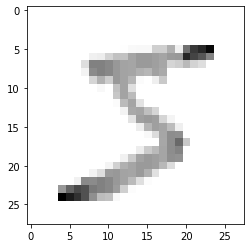

In [12]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

In [13]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
# Configuration du modele
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

In [15]:
# Entrainement du modele
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 955us/step - loss: 0.4762 - accuracy: 0.8618
Epoch 2/3
1875/1875 [==============================] - 2s 962us/step - loss: 0.1140 - accuracy: 0.9657
Epoch 3/3
1875/1875 [==============================] - 2s 935us/step - loss: 0.0704 - accuracy: 0.9783


In [16]:
# Résultat de l'apprentissage
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 658us/step - loss: 0.0904 - accuracy: 0.9717
0.09039949625730515 0.9717000126838684


In [18]:
# Sauvegarde du model
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [19]:
# Import du model
new_model = tf.keras.models.load_model('epic_num_reader.model')

1


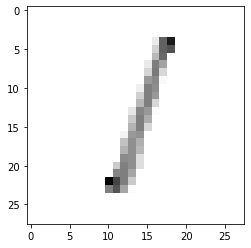

In [22]:
# Test identification d'un nombre avec le modèle chargé
prediction = new_model.predict([x_test])
import numpy as np 
plt.imshow(x_test[0], cmap= plt.cm.binary)
print(np.argmax(prediction[0]))